In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
#Load Your Dataset
df=pd.read_csv("Salary Data.csv")
df.head()    

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [4]:
df.columns = ['Age', 'Gender', 'Education_Level', 'Job_Title', 'Experience', 'Salary']


In [5]:
df.head()

,Age,Gender,Education_Level,Job_Title,Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [6]:
df.isna().sum()

Age                2
Gender             2
Education_Level    2
Job_Title          2
Experience         2
Salary             2
dtype: int64

In [7]:
df = df.dropna()

In [8]:
#Encode Categorical Features
X = df[['Age', 'Gender', 'Education_Level', 'Job_Title', 'Experience']]
y = df['Salary']

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded.head()


,Age,Experience,Gender_Male,Education_Level_Master's,Education_Level_PhD,Job_Title_Accountant,Job_Title_Administrative Assistant,Job_Title_Business Analyst,Job_Title_Business Development Manager,Job_Title_Business Intelligence Analyst,...,Job_Title_Supply Chain Manager,Job_Title_Technical Recruiter,Job_Title_Technical Support Specialist,Job_Title_Technical Writer,Job_Title_Training Specialist,Job_Title_UX Designer,Job_Title_UX Researcher,Job_Title_VP of Finance,Job_Title_VP of Operations,Job_Title_Web Developer
0,32.0,5.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,28.0,3.0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45.0,15.0,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,7.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52.0,20.0,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
#Train the model
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
#Evaluate the Model
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 18821.49141294825
R² Score: 0.8522475952130868


In [30]:
import fitz  # PyMuPDF

def extract_text_from_pdf(file_path):
    text = ""
    pdf = fitz.open(file_path)
    for page in pdf:
        text += page.get_text()
    return text

resume_text = extract_text_from_pdf(r"C:\Users\VISMAYA\Downloads\sample_resume.pdf")
print(resume_text[:1000])  # Just preview first 1000 characters


John Doe   
Age: 25   
Gender: Male   
Job Title: Software Engineer   
Email: john.doe@example.com   
Phone: +91 9876543210   
Location: Bangalore, India   
LinkedIn: linkedin.com/in/johndoe   
GitHub: github.com/johndoe   
--- 
 
  Experience   
  Software Engineer – ABC Tech Pvt Ltd (2020–Present)   
- Built and maintained scalable web applications using Django and React   
- Improved app performance by 30% using code optimization and caching   
- Integrated third-party APIs for payment and geolocation services 
 
  Intern – XYZ Solutions (2019–2020)   
- Created automation scripts in Python for internal data processing   
- Assisted in developing a chatbot using Dialogflow and Flask 
 
--- 
 
  Education   
Bachelor of Engineering (B.E.) in Computer Science – BNMIT, Bangalore   
CGPA: 8.7/10 | Graduation Year: 2020 
 
--- 
 
  Skills   
Python, JavaScript, HTML/CSS, Django, React.js, Git, MySQL, MongoDB, Docker, REST APIs 
 
--- 
 
  Certifications   
- CS50x by Harvard University  

In [39]:
import re

def extract_experience_years(text):
    experience_blocks = re.findall(r'\((\d{4})[–-](\d{4}|Present)\)', text)
    total_years = 0
    for start, end in experience_blocks:
        start = int(start)
        end = 2024 if end.lower() == "present" else int(end)
        total_years += end - start
    return total_years


In [40]:
def extract_education_level(text):
    education_match = re.search(
        r"(Bachelor of [A-Za-z\s]+|Master of [A-Za-z\s]+|Ph\.?D|Diploma)",
        text, re.IGNORECASE)
    if education_match:
        return education_match.group(1).replace("Bachelor of", "Bachelor's").replace("Master of", "Master's")
    return None


In [41]:
def extract_resume_data(text):
    data = {}

    # Name (first line)
    data["Name"] = text.strip().split("\n")[0]

    # Age, Gender
    age_match = re.search(r'Age:\s*(\d+)', text)
    gender_match = re.search(r'Gender:\s*(Male|Female|Other)', text, re.IGNORECASE)
    data["Age"] = int(age_match.group(1)) if age_match else None
    data["Gender"] = gender_match.group(1).capitalize() if gender_match else None

    # Job Title
    job_title_match = re.search(r'Job Title:\s*(.+)', text, re.IGNORECASE)
    data["Job Title"] = job_title_match.group(1).strip() if job_title_match else None

    # Contact Info
    data["Email"] = re.search(r"[\w\.-]+@[\w\.-]+", text).group()
    data["Phone"] = re.search(r"\+91\s?\d{10}", text).group()
    data["Location"] = re.search(r"Location:\s*(.+)", text).group(1).strip()

    # LinkedIn / GitHub
    linkedin = re.search(r"linkedin\.com\/in\/[^\s|]+", text)
    github = re.search(r"github\.com\/[^\s|]+", text)
    data["LinkedIn"] = linkedin.group() if linkedin else None
    data["GitHub"] = github.group() if github else None

    # Skills
    skills_block = re.search(r"Skills\s+(.+?)\s+---", text, re.DOTALL)
    if skills_block:
        raw_skills = skills_block.group(1)
        skill_list = re.split(r"[,\n]", raw_skills)
        data["Skills"] = [s.strip() for s in skill_list if s.strip()]
    else:
        data["Skills"] = []

    # Experience (calculated)
    data["Experience"] = extract_experience_years(text)

    # Education
    data["Education_Level"] = extract_education_level(text)

    return data


In [42]:
parsed = extract_resume_data(resume_text)

for key, value in parsed.items():
    print(f"{key}: {value}")


Name: John Doe   
Age: 25
Gender: Male
Job Title: Software Engineer
Email: john.doe@example.com
Phone: +91 9876543210
Location: Bangalore, India
LinkedIn: linkedin.com/in/johndoe
GitHub: github.com/johndoe
Skills: ['Python', 'JavaScript', 'HTML/CSS', 'Django', 'React.js', 'Git', 'MySQL', 'MongoDB', 'Docker', 'REST APIs']
Experience: 5
Education_Level: Bachelor's Engineering 


In [43]:
import pandas as pd

def prepare_resume_input(parsed_resume, X_columns):
    # Base features
    age = parsed_resume.get("Age", 0)
    experience = parsed_resume.get("Experience", 0)
    education = parsed_resume.get("Education_Level", "")

    gender = parsed_resume.get("Gender", "")
    
    job_title = parsed_resume.get("Job Title", None)  

    # Start with all 0s
    input_dict = {col: 0 for col in X_columns}

    # Assign age and experience
    input_dict["Age"] = age
    input_dict["Experience"] = experience

    # Handle categorical one-hot encoded columns
    if f"Gender_{gender}" in X_columns:
        input_dict[f"Gender_{gender}"] = 1
    if f"Education_Level_{education}" in X_columns:
        input_dict[f"Education_Level_{education}"] = 1
    if f"Job_Title_{job_title}" in X_columns:
        input_dict[f"Job_Title_{job_title}"] = 1

    return pd.DataFrame([input_dict])


In [44]:
# Make sure model is trained
from sklearn.linear_model import LinearRegression

# Example: Train your model
model = LinearRegression()
model.fit(X_encoded, y)

# Now predict from resume
input_df = prepare_resume_input(parsed, X_encoded.columns)
predicted_salary = model.predict(input_df)[0]
print(f"💰 Predicted Salary: ₹{predicted_salary:,.2f}")


💰 Predicted Salary: ₹74,450.26


In [45]:
projected_salaries = [predicted_salary * (1 + 0.07)**i for i in range(1, 4)]
for i, salary in enumerate(projected_salaries, 1):
    print(f"Year {i} projected salary: ₹{int(salary)}")


Year 1 projected salary: ₹79661
Year 2 projected salary: ₹85238
Year 3 projected salary: ₹91204


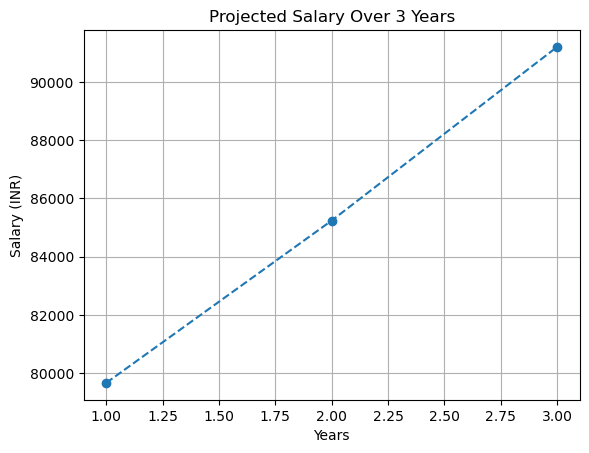

In [46]:
import matplotlib.pyplot as plt

years = [1, 2, 3]
plt.plot(years, projected_salaries, marker='o', linestyle='--')
plt.title("Projected Salary Over 3 Years")
plt.xlabel("Years")
plt.ylabel("Salary (INR)")
plt.grid(True)
plt.show()


In [47]:
# Skill Gap Analysis
required_skills = {
    "Software Engineer": ["Python", "Django", "Git", "React.js", "Docker"],
    "Frontend Developer": ["HTML/CSS", "JavaScript", "React.js", "Git", "Bootstrap", "Figma"],
    "Backend Developer": ["Python", "Django", "Flask", "PostgreSQL", "Docker", "REST APIs"],
    "Full Stack Developer": ["HTML/CSS", "JavaScript", "React.js", "Node.js", "MongoDB", "Express.js", "Git"],
    "Data Analyst": ["Python", "SQL", "Pandas", "Excel", "Tableau", "Matplotlib", "NumPy"],
    "Data Scientist": ["Python", "Pandas", "Scikit-learn", "TensorFlow", "Keras", "SQL", "Matplotlib", "Deep Learning"],
    "ML Engineer": ["Python", "Scikit-learn", "TensorFlow", "PyTorch", "ML Ops", "Docker", "APIs"],
    "DevOps Engineer": ["Docker", "Kubernetes", "CI/CD", "AWS", "Terraform", "Linux", "Git"],
    "Cybersecurity Analyst": ["Network Security", "Ethical Hacking", "Python", "Wireshark", "Metasploit", "Burp Suite"],
    "UI/UX Designer": ["Figma", "Adobe XD", "Wireframing", "Prototyping", "User Research", "Design Thinking"],
    "Cloud Engineer": ["AWS", "Azure", "Google Cloud", "Terraform", "Docker", "CI/CD", "Linux"],
    "Mobile App Developer": ["Java", "Kotlin", "Flutter", "React Native", "Android Studio", "Firebase"],
    "AI Engineer": ["Python", "Deep Learning", "OpenCV", "TensorFlow", "NLP", "Keras", "Transformers"],
    "Product Manager": ["Agile", "JIRA", "Product Roadmap", "Wireframing", "Stakeholder Management", "Market Research"],
    "Technical Writer": ["Markdown", "Documentation", "API Writing", "Git", "Technical Blogging", "WordPress"]
}

def skill_gap_analysis(parsed_resume, required_skills):
    job_title = parsed_resume.get("Job Title", None)
    user_skills = parsed_resume.get("Skills", [])

    print("\nSkill Gap Analysis:")

    if not job_title:
        print("⚠️ Job title not found in resume. Skill gap analysis skipped.")
        return

    if job_title not in required_skills:
        print(f"⚠️ Skill requirements not defined for role: {job_title}")
        return

    required = required_skills[job_title]
    missing_skills = list(set(required) - set(user_skills))

    print(f"Job Title Detected: {job_title}")
    print(f"Skills You Have: {user_skills}")
    print(f"Required Skills: {required}")

    if not missing_skills:
        print("🎯 Awesome! You have all the required skills for this role!")
    else:
        print("🚧 Skills you're missing for this role:")
        for skill in missing_skills:
            print(f"   - {skill}")


skill_gap_analysis(parsed, required_skills)



Skill Gap Analysis:
Job Title Detected: Software Engineer
Skills You Have: ['Python', 'JavaScript', 'HTML/CSS', 'Django', 'React.js', 'Git', 'MySQL', 'MongoDB', 'Docker', 'REST APIs']
Required Skills: ['Python', 'Django', 'Git', 'React.js', 'Docker']
🎯 Awesome! You have all the required skills for this role!
